In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from textblob import TextBlob

In [5]:
data = pd.read_csv('Data/FIFA.csv', sep = ',')

In [107]:
data.tail(1)

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends,Sentimental,Polyarity
529999,1018628574272786438,en,2018-07-15 22:49:11,Twitter Web Client,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96746,WorldCup,Khaled Beydoun,KhaledBeydoun,?????,"Pittsburgh, PA",173,268,0.25,positive


In [115]:
data['Date'] = pd.to_datetime(data['Date'])

In [116]:
data['Sentimental'] = data['Tweet'].apply(lambda x: TextBlob(str(x)).polarity)

In [216]:
data['Subjectivity'] = data['Tweet'].apply(lambda x: TextBlob(str(x)).subjectivity) 

In [218]:
data_aggr = data.set_index('Date').groupby(pd.Grouper(freq='S')).mean().dropna(axis = 0)

In [219]:
data_aggr['Polyarity'] = data_aggr['Sentimental'].apply(lambda x: 'negative' if x < 0 else ('positive' if x > 0 else 'neutral'))

In [221]:
data_aggr = data_aggr[(data_aggr.index > '2018-07-15 00:33:45') & (data_aggr.index < '2018-07-15 23:02:00')]

In [222]:
data_aggr.to_csv('Data/data_aggr.csv')

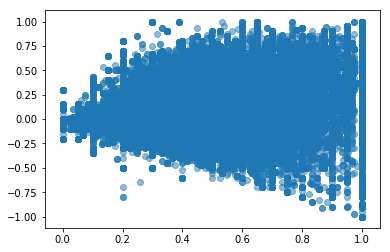

In [217]:
plt.scatter(data['Subjectivity'],data['Sentimental'],alpha=0.5)